# <center style="color:#FF00FF" > TP SEGMENTATION </center>
### <center style="color:#ffc6b3" > Abir Benamor  </center>
### <center style="color:#ffc6b3" > 3DNI2  </center>

***************************************


## <span style="color:#F5B041 "> INTRODUCTION :

<div > <span style="color:black">
<strong> La segmentation d'images est le processus de division d'images en segments en fonction de leurs caractéristiques de pixels. Cela nous aide à analyser et à comprendre les images de manière plus significative. La segmentation d'images a un large éventail de cas d'utilisation, elle est utilisée dans l'industrie médicale pour un diagnostic efficace et plus rapide, la détection des maladies.

<div > <span style="color:black">
<strong> Nous utilisons divers algorithmes de segmentation d'images (non supervisés : kmeans) pour regrouper des ensembles de pixels qui traitent certaines similitudes. nous attribuons en fait des étiquettes aux pixels et les pixels avec la même étiquette appartiennent à la même catégorie.

<img src ="image-def-segmentation.png">

## <span style="color:#F5B041 "> DEMONSTRATION : 

In [28]:
!pip install opencv-python

In [29]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def seg(k):
    image = cv2.imread('image_t.jpg')

    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = 7)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    cv2.imwrite('image_t7.jpg', quant)
    return plt.imshow(image)

cv2.imread('image_t.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
interact(seg,k=widgets.IntSlider(min=2, max=10, step=1, value=2));


interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

### La partie suivante on va traiter l'effet du bruit appliqué sur une image pour détérminer les conséquences de ces bruits .

### Pour cela on utilise la fonction random_noise du module util de la bibliothéque skimage.

In [31]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="image_t.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="image_t.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
     
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 
plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt", "pepper", "s&p", "speckle",None]);

 

plt.show()


<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'pepper…

### Pour la suite de notre travail , on choisit de continuer avec le  bruit  pepper 

### la résultat de ce bruit est enregistré dans l'image  "result.png"

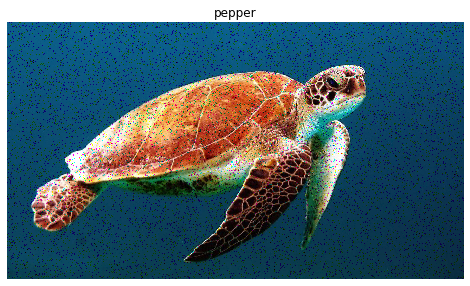

In [32]:
import skimage.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
img_path="image_t.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        mpimg.imsave("result.png",  gimg)
        
  
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2

plotnoise(img, "pepper", r,c,4)

plt.show()


###  On appliquer le clustering sur cette image bruitée avec K = 2 


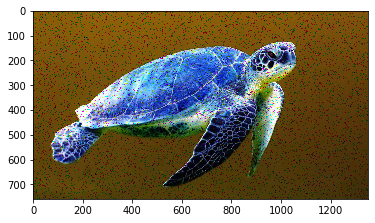

In [33]:

import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('result.png')

(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('result2.png', quant)
plt.imshow(image)

cv2.imread('result.png')
cv2.waitKey(0)
cv2.destroyAllWindows()





### On remarque que  le performance d'algorithme de clustering sur une image bruité est moins performant par rapport au début .

### il faut qu'on élimine le bruit puis on appliqueK-means pour conclure la différance 

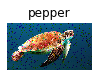

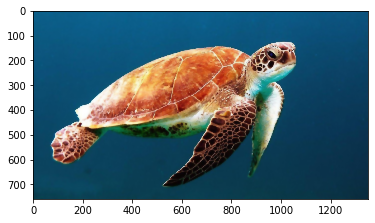

In [34]:
from skimage.restoration import denoise_tv_chambolle
import skimage.io
import matplotlib.pyplot as plt
# Apply total variation filter denoising
img_path="result.jpg"

plotnoise(img, "pepper", r,c,3)
plt.show()
noise = denoise_tv_chambolle(img,
weight=0.1,
multichannel=True)
# Show denoised image
#plt.imshow(img)
plt.imshow(noise)
plt.imsave("imaeliminebruit6.jpg",noise)

### Passant maintenant à l'application de K-means

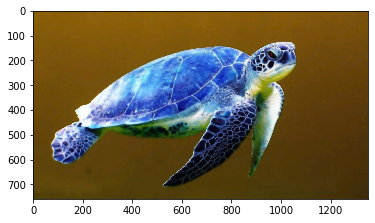

In [35]:
image = cv2.imread('imaeliminebruit6.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('imaelibruit2.jpg', quant)
plt.imshow(image)

cv2.imread('imaelibruit.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Conclusion: 
> * le clustering => determiner les couleurs dominants dans l'image
>* lorqu'on augmente le nombre de clusters , l'image segmentée proche de l'image originale
>* la performance de clustering diminue lorsque l'image est bruité meme lorsqu'on essaie d'éliminer cette bruit

In [38]:

pip install watermark


Note: you may need to restart the kernel to use updated packages.


In [43]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [44]:
%watermark?

In [45]:
%watermark --iversions


numpy     : 1.18.1
skimage   : 0.16.2
ipywidgets: 7.5.1
PIL       : 7.0.0
matplotlib: 3.1.3
cv2       : 4.5.4-dev

